# Conclusion Notebook

This notebook has all the code that was used to generate the figures in conclusion chapter of the thesis

In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

# Define directory for saving figures

In [11]:
# workstation = "deepnote"
# workstation = "laptop"
workstation = 'svante'

if workstation=='laptop':
    fig_path='/Users/shakes/Dropbox/Apps/Overleaf/Thandolwethu Dlamini Thesis/templates/figures/'
elif workstation=='svante':
    fig_path = "/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow/MIT_TPP_thesis/UpdatedFigures/chapter_4/"
else:
    fig_path='/work/MIT_TPP_thesis/figures/'

In [12]:
total_estimates={
    "gma_2015":{'lbound':55.18,
                'ubound':165.543,
                'actual':110.36},
    "AGC_2018":{'lbound':54.37,
                'ubound':163.11,
                'actual':108.74},
    "TPP_2015":{'lbound':11.45,
                'ubound':236.69,
                'actual':101},
        
    }

In [13]:
df_est=pd.DataFrame(total_estimates)
df_est

,gma_2015,AGC_2018,TPP_2015
lbound,55.180,54.37,11.45
ubound,165.543,163.11,236.69
actual,110.360,108.74,101.00


In [14]:
gma=df_est['gma_2015'].loc['actual']
tpp=df_est['TPP_2015'].loc['actual']
agc=df_est['AGC_2018'].loc['actual']

print(f"GMA 2018 under prediction: {gma/tpp}")
print(f"AGC under prediction: {agc/tpp}")

GMA 2018 under prediction: 1.0926732673267328
AGC under prediction: 1.0766336633663365


In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='GMA 2018 Estimate',
    x=['GMA 2018 Estimate'], y=[df_est['gma_2015'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=50,
            valueminus=50)
))
fig.add_trace(go.Bar(
    name='AGC Estimate',
    x=['AGC Estimate'], y=[df_est['AGC_2018'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=50,
            valueminus=50)
))
fig.add_trace(go.Bar(
    name='Top Down Estimate',
    x=['Top Down Estimate'], y=[df_est['TPP_2015'].loc['actual']],
    error_y=dict(type='percent', symmetric=False,
            value=133,
            valueminus=90)
))

fig.update_layout(barmode='group')
fig.update_traces(width=0.5)
fig.update_layout(
    autosize=False,
     width=700,
     height=400,
    template="simple_white",
    margin={"r":0,"t":0,"l":60,"b":30},
    yaxis =  {'showgrid': True} 
)

fig.update_layout(
                  xaxis_type='category',
                  yaxis_type='linear',
                  yaxis=dict(
                      title="Hg (t/y)",
                      titlefont_size=16,
                      tickfont_size=14,),
                  bargap=0.00, # gap between bars of adjacent location coordinates.
                  legend=dict(
        title=None, orientation="h", y=1.0, yanchor="bottom", x=0.5, xanchor="center"))
fig.update_yaxes(nticks=10)
fig.show()
fig_name='all_asgm_hgEstimates_001.svg'
path=fig_path+fig_name
pio.write_image(fig, path,format='svg')

In [16]:
NAPHG=pd.DataFrame(pd.read_csv('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow/MIT_TPP_thesis/Thesis_JP_notebooks/data/NAPsubmits.csv'))
NAPHG

,Country,NAP_Mercury_use t/y,GMA_Mercury_use t/y,Target%,Taget_year
0,Central African Republic,0.0000,8.0,NaN,NaN
1,Congo,0.0200,1.5,NaN,NaN
2,Lao PDR,0.2295,3.0,NaN,NaN
3,Mongolia,0.2350,11.5,NaN,NaN
4,Sierra Leone,0.3500,11.0,NaN,NaN
5,Burundi,2.0000,0.3,NaN,NaN
6,DRC,3.7500,15.0,NaN,NaN
7,Senegal,5.2000,3.0,NaN,NaN
8,Uganda,15.0000,4.0,70%,2024.0
9,Nigeria,16.0670,20.0,NaN,NaN


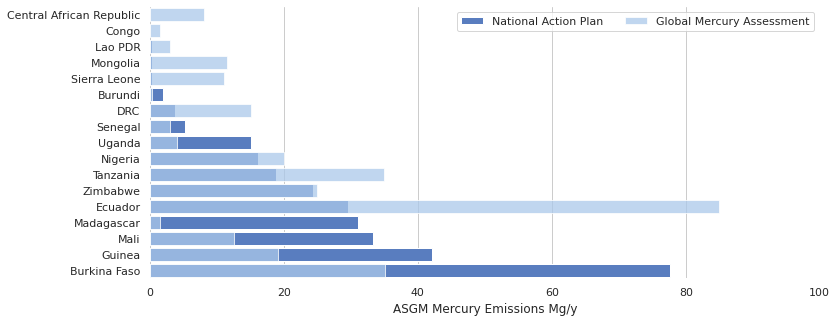

In [17]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 5))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("muted")

sns.barplot(x="NAP_Mercury_use t/y", y="Country", data=NAPHG,
            label="National Action Plan", color="b")

#Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="GMA_Mercury_use t/y", y="Country", data=NAPHG,
            label="Global Mercury Assessment", color="b",alpha=0.75)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="ASGM Mercury Emissions Mg/y")
sns.despine(left=True, bottom=True)
fig_name='global-hg-emissions-estimates_vs_nap_estimates_001.svg'
path=fig_path+fig_name
fig.savefig(path,bbox_inches='tight')